### 기술통계분석 + 그래프
  - 데이터는 와인품질 등급 예측
  - 레드와인과 화이트와인 그룹의 품질에 대한 T-검증 수행
  - 와인 속성을 독립변수, 품질을 종속변수로 선형회귀 수행
  - 기술통계( description)
    - 평균, 중앙값, 최빈값
    - 데이터를 대표하는 값을 찾을수 있고, 표준편차, 사분위수를 사용해서 데이터 분포를 확인

  - 회귀분석(regression)
    - 독립변수, 종속 변수 상호 연관성을 파악
    - 변수가 변함에따라서 종속변수가 어떻게 변하는지
    - 종류 : 단순회귀분석, 다중회귀분석, 선형회귀분석, 비선형회귀분석

  - T 검증
    - 데이터에서 찾은 평균으로 두 그룹간의 차이가 있는지 확인
    - ex) A와인의 품질이 1등급인지 2등급인지에 따라서 가격에 차이가 있다
  
  - 히스토그램

  - 데이터 : 어바인 대학 머신러닝 저장소
  - https://archive.ics.uci.edu/

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [4]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


### 기본정보 확인해 보기 info

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


### 기술통계 describe

In [7]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### 종속변수의 정보
  - 와인품질을 숫자로 표현 범주형 데이터 unique

In [8]:
sorted(y['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

In [9]:
y['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

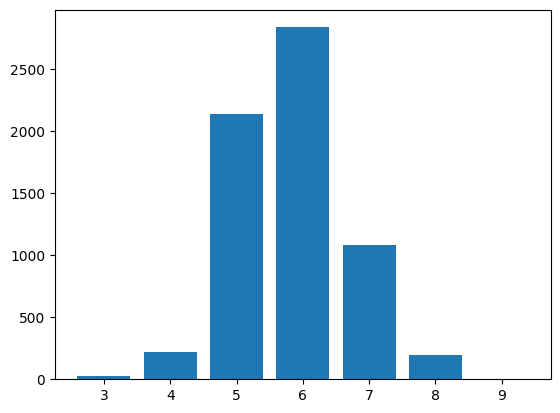

In [11]:
temp = y['quality'].value_counts()
plt.bar(temp.index, temp)
plt.show()

In [12]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


### 사이트에서 다운받은 wine+quality.zip파일을 업로드 한다

In [13]:
!unzip '/content/wine+quality.zip' -d wine

Archive:  /content/wine+quality.zip
replace wine/winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: wine/winequality-red.csv  
  inflating: wine/winequality-white.csv  
  inflating: wine/winequality.names  


In [14]:
# CSV 파일만 읽기 - 파일 경로 가져오기
import glob
csv_files = glob.glob('/content/wine/*.csv')
csv_files

['/content/wine/winequality-red.csv', '/content/wine/winequality-white.csv']

In [15]:
import pandas as pd
read_wine =  pd.read_csv(csv_files[0],sep=';')
white_wine =  pd.read_csv(csv_files[1],sep=';')

In [16]:
read_wine['type'] = 'red'
white_wine['type'] = 'white'

In [17]:
wine_df = pd.concat([read_wine, white_wine])
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [18]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [19]:
wine_df.reset_index(drop=True, inplace=True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### type별로 그룹화 해서 비교하기

In [20]:
wine_df.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [21]:
wine_df.groupby('type')['quality'].mean()

,quality
type,
red,5.636023
white,5.877909


In [22]:
wine_df.groupby('type')['quality'].std()

,quality
type,
red,0.807569
white,0.885639


In [23]:
wine_df.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


t-검증
  - t-값
    - 표본평균과 모집단 평균간의 차이를 나타냄 이 값이 클수록 두 평균 간의 차이가 크다
  - p-값
    - t-값이 귀무가설을 기각 할수 있는지의 여부나타내는 확률 일반적으로 0.05보다 작으면 귀무가설을 기각하고 대립가설을 채택

In [24]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [25]:
read_wine_quality = wine_df[wine_df['type'] == 'red']['quality']
white_wine_quality = wine_df[wine_df['type'] == 'white']['quality']
read_wine_quality.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [26]:
# 통계적인 유의미가 있는지 확인
stats.ttest_ind(read_wine_quality,white_wine_quality,equal_var=False)

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

In [27]:
# statistic=-10.149363059143164 -- >t-value  레드와인과 화이트와인의 품질 차이가 크다
# pvalue=8.168348870049682e-24,  p-value는 일반적으로 귀무가설이 참이라는 가정하에 관찰된 데이터의 확률 0.05보다 작으면 귀무가설을 기각
# 귀무가설을 기각하고 대립가설을 채택
# 레드와인과 화이트와인의 품질에대한 평균에 유의미한 차이가 있다는걸 강력하게 시사함

In [28]:
# df=2950.750452166697   자유도 검증에 사용한 데이터의 크기를 반영 높을수록 신뢰성이 높아짐

### t-test를 이용한 회귀분석
  - R 에서 파생된 모듈... 방법이 R 스럽다.

In [29]:
"fixed acidity".replace(' ','_')
wine_df.columns  # map 함수에 들어가는 함수를 람다로 해서
wine_df.columns = list(map( lambda x : x.replace(' ','_')   ,   wine_df.columns))
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [30]:
Rfomula = 'quality ~ ' + '+'.join(wine_df.columns[:-1])
Rfomula

'quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+quality'

In [31]:
regression_result =  ols(Rfomula, data=wine_df).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.879e+26
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:21:55   Log-Likelihood:             1.7314e+05
No. Observations:                6497   AIC:                        -3.463e+05
Df Residuals:                    6484   BIC:                        -3.462e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.971e-13   1.05e-11      0.028      0.977   -2.02e-11    2.08e-11
fixed_acidity        -2.277e-18   1.37e-14     -0.000      1.000   -2.69e-14    2.69e-14
volatile_acidity      6.228e-16   6.95e-14      0.009      0.993   -1.36e-13    1.37e-13
citric_acid          -2.391e-15      7e-14     -0.034      0.973    -1.4e-13    1.35e-13
residual_sugar         5.23e-16   4.56e-15      0.115      0.909   -8.41e-15    9.46e-15
chlorides            -1.091e-14   2.93e-13     -0.037      0.970   -5.84e-13    5.63e-13
free_sulfur_dioxide  -1.938e-16   6.64e-16     -0.292      0.770   -1.49e-15    1.11e-15
total_sulfur_dioxide -2.715e-17   2.45e-16     -0.111      0.912   -5.07e-16    4.53e-16
density               3.711e-13   1.07e-11      0.035      0.972   -2.06e-11    2.13e-11
pH                   -2.948e-15   7.96e-14     -0.037      0.970   -1.59e-13    1.53e-13
sulphates            -2.964e-15   6.74e-14     -0.044      0.965   -1.35e-13    1.29e-13
alcohol              -4.364e-16    1.5e-14     -0.029      0.977   -2.98e-14     2.9e-14
quality                  1.0000   1.09e-14   9.16e+13      0.000       1.000       1.000
==============================================================================
Omnibus:                     1267.182   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17878.959
Skew:                           0.525   Prob(JB):                         0.00
Kurtosis:                      11.059   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 품질 예측

In [33]:
sample1 = wine_df.columns.difference(['type','quality'])  # 'type','quality' 를 제외한 컬럼
sample1


Index(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')